**Step 0 - install and import dependencies**

In [19]:
# !pip install pythainlp
# !pip install tensorflow_text
!pip install umap-learn

In [20]:
!pip install numba

In [21]:
import numba

numba.__version__

'0.54.1'

In [22]:
import numpy as np
import pandas as pd
import re

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap.umap_ as umap

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

import pythainlp
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections


In [23]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' for a large model

model = hub.load(module_url)

In [24]:
df = pd.read_csv("Wongnai Reviews - Small.csv")

In [25]:
df.head()

Review ID  \
0          1   
1          2   
2          3   
3          4   
4          5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเดินเข้าไปสั่ง ความคิดแรกที่เห็นปริมาณของกาแฟร้อนก็เฟลแล้ว มีอยู่ครึ่งแก้วน้อยๆได้ พอตอนดื่มยิ่งเฟลหนักกว่าเดิม หาความเป็น Macchiato ไม่เจอเลย หลังจากนี้ลาขาด กินกาแฟโบราณแก้วละ 20 บาทยังมีความสุขมากกว่าอีก  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

**Step 1 - document embedding and dimension reduction**

In [26]:
#embed sentences using Universal Sentence Encoder (USE)

embed_comments_array = model(df['Review'].values).numpy()
len(embed_comments_array)

300

In [27]:
#reduce array dimensions using umap (you can chagne n_components)

reducer = umap.UMAP(random_state=42,n_components=50)
umap_embed_comments_array = reducer.fit_transform(embed_comments_array)
len(umap_embed_comments_array)

300

**Step 2 - document clustering using KMeans**

C:\Users\Nontouch\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'WCSS')

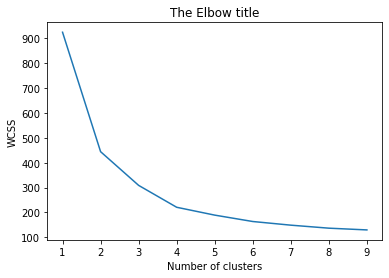

In [28]:
#run kmeans with various number of k. evaluate no. of k based on the elbow plot

wcss=[]
max_k = 10
for i in range(1, max_k):
  kmeans = KMeans(i)
  kmeans.fit(umap_embed_comments_array)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, max_k)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [29]:
#run kmeans with no. of clusters you see fit the most

k = 4

kmeans = KMeans(n_clusters = k)
kmeans.fit(umap_embed_comments_array)

df['KMeans ID'] = kmeans.labels_
df

Review ID  \
0            1   
1            2   
2            3   
3            4   
4            5   
..         ...   
295        296   
296        297   
297        298   
298        299   
299        300   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเดินเข้าไปสั่ง ความคิดแรกที่เห็นปริมาณของกาแฟร้อนก็เฟลแล้ว มีอยู่ครึ่งแก้วน้อยๆได้ พอตอนดื่มยิ่งเฟลหนักกว่าเดิม หาความเป็น Macchiato ไม่เจอเลย หลังจากนี้ลาขาด กินกาแฟโบราณแก้วละ 20 บาทยังมีความสุขมากกว่าอีก   
1                                                                                                                                                                                                                                                                                                                                                                       

In [30]:
#merge all reviews of each cluster into one big sentence 

df_kmeans = pd.DataFrame(columns=["KMeans ID", "texts"])


for i in range(0, k):
  row = []
  row.append(i)
  row.append(df['Review'][df['KMeans ID'] == i].to_string())
  df_kmeans.loc[len(df_kmeans)] = row

In [31]:
df_kmeans

KMeans ID  \
0         0   
1         1   
2         2   
3         3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [32]:
pd.set_option('display.max_colwidth', None)
df_kmeans[df_kmeans["texts"].str.contains("ถูก")]

KMeans ID  \
0         0   
1         1   
2         2   
3         3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [33]:
#create regex compiler for removal of a character you don't want
#didn't work properly
special_characters = "/[!@#$%^&*']/g"
# special_characters = "[-()\"#/@;:<>{}`+=~|.!?,]"

specialchar_pattern = re.compile(special_characters)

In [34]:
#create regex compiler for removal of any emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [35]:
#create regex compiler for removal of digit

number_pattern = re.compile("[0-9]")

In [36]:
#create regex compiler for removal of white space

space_pattern = re.compile("\s+")

In [37]:
#create regex compiler for removal of .

dot_pattern = re.compile(r"\.+")

In [38]:
#create regex compiler for removal of \

backslash_pattern = re.compile(r"\\+")

In [60]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization

stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['u', 'b', 'n', 'nn', 'nn-', '\n', 'ร้าน',"['","(",")",":"]
screening_words = stopwords + removed_words

new_words = {"สตารบัก","ไม่แพง","ถูกใจ","ไม่ถูกใจ"}

words = new_words.union(thai_words())

custom_dictionary_trie = Trie(words)

def tokenize_to_list(sentence):
  merged = []
  words = pythainlp.word_tokenize(str(sentence), custom_dict=custom_dictionary_trie) 
  for word in words:
    if word not in screening_words:
      merged.append(word)
  return merged

In [61]:
#clean and tokenize sentences. count the occurences of each word

df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_kmeans['texts_tokenized'] = df_kmeans['texts'].apply(lambda x: tokenize_to_list(x))
df_kmeans['texts_count'] = df_kmeans['texts_tokenized'].apply(lambda x: collections.Counter(x).most_common())

In [62]:
#results of tokenization
pd.set_option('display.max_colwidth', 50)
df_kmeans

KMeans ID                                              texts  \
0         0  กวงทะเลเผาอาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คา...   
1         1  เป็นคนที่ชอบทานMacchiatoเป็นประจำมีวันนึงเดินเ...   
2         2  เคยเป็นไหมกันไหมคะหลังอาหารมื้อใหญ่ต่อให้อิ่มย...   
3         3  วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...   

                                     texts_tokenized  \
0  [กวง, ทะเล, เผา, อาหารทะเล, เค้า, สด, เนื้อ, ป...   
1  [คน, ชอบ, ทาน, Macchiato, เป็นประจำ, นึง, เดิน...   
2  [ไหม, ไหม, หลังอาหาร, มื้อ, ต่อให้, อิ่ม, ง๊าย...   
3  [มีโอกาส, ตื่น, เช้า, โอกาส, มาหา, อร่อย, ทาน,...   

                                         texts_count  
0  [(อร่อย, 213), (รสชาติ, 178), (ทาน, 160), (จาน...  
1  [(กาแฟ, 207), (ทาน, 104), (อร่อย, 99), (เค้ก, ...  
2  [(ชา, 161), (นม, 109), (ไข่มุก, 102), (รสชาติ,...  
3  [(กิน, 145), (อร่อย, 140), (อาหาร, 111), (ดี, ...

In [63]:
#show top keywords of each cluster

top_N_words = 30

for i in range(0, len(df_kmeans)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_kmeans['texts_count'][i])[:top_N_words]}\n")

#tune a model by remove unwanted characters and words and add more words to a custom dictionary

Cluster ID : 0

Most common words include : [('อร่อย', 213), ('รสชาติ', 178), ('ทาน', 160), ('จาน', 135), ('อาหาร', 125), ('เมนู', 114), ('ดี', 105), ('สั่ง', 102), ('กิน', 91), ('เนื้อ', 87), ('ปลา', 77), ('ชอบ', 76), ('ราคา', 75), ('หมู', 74), ('บาท', 67), ('น้ำ', 65), ('คน', 65), ('หอม', 61), ('ทอด', 60), ('กรอบ', 59), ('หวาน', 54), ('ซอส', 54), ('กุ้ง', 53), ('ดู', 53), ('เค้า', 50), ('ส้มตำ', 49), ('ไก่', 48), ('สลัด', 47), ('กก', 46), ('ใส่', 46)]

Cluster ID : 1

Most common words include : [('กาแฟ', 207), ('ทาน', 104), ('อร่อย', 99), ('เค้ก', 98), ('นั่ง', 95), ('ดี', 93), ('รสชาติ', 78), ('ร้านกาแฟ', 71), ('ราคา', 71), ('บรรยากาศ', 67), ('สั่ง', 65), ('ลอง', 61), ('ชา', 60), ('เมนู', 59), ('ชอบ', 58), ('กิน', 51), ('บาท', 48), ('เครื่องดื่ม', 45), ('ผม', 44), ('คน', 42), ('อาหาร', 39), ('บริการ', 39), ('หวาน', 39), ('หอม', 35), ('ดู', 35), ('ดื่ม', 33), ('เย็น', 32), ('แก้ว', 31), ('ตกแต่ง', 30), ('เลือก', 30)]

Cluster ID : 2

Most common words include : [('ชา', 161), ('นม', 

**Step 3 - document clustering using Agglomorative Clustering with cosine similarity**

In [64]:
#clustering using agglomorative clustering

knn_graph = kneighbors_graph(embed_comments_array, 5, include_self=False)
model = AgglomerativeClustering(linkage="average", connectivity=knn_graph, n_clusters=10, affinity="cosine")
model.fit(embed_comments_array)
df['Agglomerative ID'] = model.labels_

In [65]:
#merge all reviews of each cluster into one big sentence 

df_Agglomerative = pd.DataFrame(columns=["Agglomerative ID", "texts"])


for i in range(0, k):
  row = []
  row.append(i)
  row.append(str(df['Review'][df['Agglomerative ID'] == i].tolist()))
  df_Agglomerative.loc[len(df_Agglomerative)] = row

In [66]:
df_Agglomerative

Agglomerative ID                                              texts
0                0  ['เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึง...
1                1  ['ประโยชน์ของน้ำแตงโมปั่น\nแตงโม มีมากมายหลายพ...
2                2  ['วันนี้ดิช้ันมาทบนอาหารเวลา5 โมงเย็น ที่ร้านแ...
3                3  ['เรื่องขนม ไม่ค่อยสันทัด ดังนั้นขอreviewเฉพาะ...

In [67]:
#clean and tokenize sentences. count the occurences of each word

df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_Agglomerative['texts_tokenized'] = df_Agglomerative['texts'].apply(lambda x: tokenize_to_list(x))
df_Agglomerative['texts_count'] = df_Agglomerative['texts_tokenized'].apply(lambda x: collections.Counter(x).most_common())

In [68]:
df_Agglomerative

Agglomerative ID                                              texts  \
0                0  ['เป็นคนที่ชอบทานMacchiatoเป็นประจำมีวันนึงเดิ...   
1                1  ['ประโยชน์ของน้ำแตงโมปั่นnแตงโมมีมากมายหลายพัน...   
2                2  ['วันนี้ดิช้ันมาทบนอาหารเวลาโมงเย็นที่ร้านแม่ศ...   
3                3  ['เรื่องขนมไม่ค่อยสันทัดดังนั้นขอreviewเฉพาะเร...   

                                     texts_tokenized  \
0  [คน, ชอบ, ทาน, Macchiato, เป็นประจำ, นึง, เดิน...   
1  [ประโยชน์, น้ำ, แตงโม, ปั่น, แตงโม, พันธุ์, เล...   
2  [ดิ, ช้ัน, ทบ, น, อาหาร, เวลา, โมง, เย็น, แม่ศ...   
3  [เรื่อง, ขนม, สันทัด, ดังนั้น, review, เฉพาะเร...   

                                         texts_count  
0  [(อร่อย, 508), (ทาน, 416), (รสชาติ, 407), (ดี,...  
1  [(แตงโม, 22), (น้ำ, 8), (ปั่น, 6), (เนื้อ, 6),...  
2  [(ดิชั้น, 4), (แย่มาก, 3), (โต๊ะ, 2), (รอง, 2)...  
3  [(นม, 3), (แน่น, 2), (tamp, 2), (เท, 2), (แก้,...

In [70]:
#show top keywords of each cluster

top_N_words = 30

for i in range(0, len(df_Agglomerative)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_Agglomerative['texts_count'][i])[:top_N_words]}\n")

Cluster ID : 0

Most common words include : [('อร่อย', 508), ('ทาน', 416), ('รสชาติ', 407), ('ดี', 347), ('กิน', 339), ('กาแฟ', 311), ('เมนู', 309), ('สั่ง', 301), ('อาหาร', 285), ('ราคา', 273), ('ชา', 262), ('บาท', 242), ('ชอบ', 229), ('คน', 215), ("','", 215), ('หวาน', 206), ('นั่ง', 201), ('จาน', 196), ('ผม', 184), ('ลอง', 178), ('นะคะ', 154), ('บรรยากาศ', 151), ('นม', 149), ('ดู', 147), ('-', 142), ('เค้า', 136), ('หอม', 136), ('รส', 136), ('เค้ก', 132), ('เนื้อ', 130)]

Cluster ID : 1

Most common words include : [('แตงโม', 22), ('น้ำ', 8), ('ปั่น', 6), ('เนื้อ', 6), ('เลือก', 4), ('ซื้อ', 4), ('ดื่ม', 4), ('พันธุ์', 3), ('รับประทาน', 3), ('แก้', 3), ('อาหาร', 3), ('ร่างกาย', 3), ('เมล็ด', 2), ('มีรส', 2), ('หวาน', 2), ('เย็น', 2), ('ยังมี', 2), ('วิตามิน', 2), ('สีแดง', 2), ('ผลไม้', 2), ('กระหาย', 2), ('ดี', 2), ('สำหรับ', 2), ('ล้าง', 2), ('โรค', 2), ('ประโยชน์', 1), ('นิยม', 1), ('จินต', 1), ('หรา', 1), ('ตอ', 1)]

Cluster ID : 2

Most common words include : [('ดิชั้น', 4), ('

**Step 4 - result discussion**

## สิ่งที่เปลี่ยนแปลง
   <s>1.ปรับ Engine Pythai จาก newmm เป็น longest เพื่อหาคำศัพท์ที่ยาวที่สุดใน dictionary ไทย</s> ไม่เวิร์คเพราะ longest ใช้เวลาประมวลผลนานเกินไป
   
   2.เพิ่มการกรองคำสำคัญ เช่น ไม่แพง,ถูกใจ,ไม่ถูกใจ เพื่อตรวจสอบความเป็น positive หรือ negative ภายในกลุ่ม cluster
   
   3.Manual Remove Special Character เพราะ function ทำงานผิดปกติ(ไม่ยอมลบ special character ให้)
   
## ผลลัพธ์
### Kmean Model
    Cluster ID : 0 : ร้านอาหาร
        มีการค้นพบคีย์เวิร์ดเกี่ยวกับตัวอาหารค่อนข้างเยอะ
    Cluster ID : 1 : ร้านกาแฟ/คาเฟ่
    Cluster ID : 2 : ร้านชานมไข่มุก/เครื่องดื่ม
    Cluster ID : 3 : ร้านอาหาร(บรรยากาศดี)
        แตกต่างจาก Cluster 0 เนื่องจากไม่เจอคีย์เวิร์ดเกี่ยวกับตัวอาหารมากนัก
    **ข้อสังเกต : ส่วนใหญ่คำที่คนใช้รีวิวจะเป็นรีวิวในแง่ดี
### Agglomerative Model
    Cluster ID : 0 : กลุ่มที่มีจำนวนคำที่เจอเยอะที่สุด (Common words)
    Cluster ID : 1 : กลุ่มที่มีจำนวนคำที่เจอเยอะรองลงมาจาก cluster 0
    Cluster ID : 2 : กลุ่มที่มีจำนวนคำที่เจอเยอะรองลงมาจาก cluster 1
    Cluster ID : 3 : กลุ่มที่มีจำนวนคำที่เจอเยอะรองลงมาจาก cluster 2